<a href="https://github.com/Applied-Machine-Learning-2022/final-project-group6-morganstate/blob/5e15c87132a92f269601f1a02d817846f6c7e360/Spam_and_Ham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Prepping the `DataFrame`

When opening the colab it will often not include our spam dataset file.  
Add Spam.csv to the folder first for now, while I upload it to kaggle and create the import commands in the meantime.

The Spam Dataset originally uses the wrong encoding for the excel sheet.
Instructions to fix the data set are [here](https://medium.com/code-kings/python3-fix-unicodedecodeerror-utf-8-codec-can-t-decode-byte-in-position-be6c2e2235ee)
  
  The steps include:  

  1. Right click span and click open with -> Notepad
  1. Click file -> save as -> and keep the name the same but there will be an encoding option that is set to ANSI. Change it to UTF-8
  1. Click Save. It will ask if you want to overwrite spam, click yes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# uploaded the dataframe using pandas read_csv
df = pd.read_csv('spam.csv')

# look at what columns we have
df.columns.values

array(['label', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],
      dtype=object)

In [2]:
# displays the first 5 entries of our dataframe
df.head(5)

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# displays a full summary of our dataframe
# showing our column names and their index, non-null count and the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5572 non-null   object
 1   message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 108.9+ KB


In [4]:
# check the descriptions of dataframe
df.describe()

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
# missing values in these unnamed columns we dont need so lets drop them from our dataframe
df.isna().any()

label         False
message       False
Unnamed: 2     True
Unnamed: 3     True
Unnamed: 4     True
dtype: bool

In [6]:
# dropped these columns since we do not need them for detecting spam
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
# changing the label column values to 0 and 1 for spam or ham
column = 'label'
for k, v in {'ham': 0, 'spam': 1}.items():
  df.loc[df[column] == k, column] = v

In [8]:
# lets split our data now into X and y
X = df['message'].values
y = df['label'].values

# if you remember when checked the .info() of our dataframe all of our datatypes were of type Object
# above y is just a list of numbers stored as objects, so we cast it as type int
y = y.astype(int)

In [9]:
from sklearn.model_selection import train_test_split

# here we then split our data again by 30% and 70%
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

In [10]:
import re
import random

# next we are going to clean the data by removing punctations, URLs and numbers and we are going to change everyting to lowercase

def clean_email(msg):
  # turns the text into lowercase
  msg = msg.lower()
  # removes special characters
  msg = re.sub(r'[^0-9a-zA-Z]', ' ', msg)
  # this removes the whitespace
  msg = ''.join(word + (' ' * random.randint(1, 10)) for word in msg.split(' '))
  return msg

df['message'] = df['message'].apply(clean_email)
df.head(25)

,label,message
0,0,go until jurong point cr...
1,0,ok lar joking wif...
2,1,free entry in 2 a wkly com...
3,0,u dun say so early ...
4,0,nah i don t think ...
5,1,freemsg hey there darling it ...
6,0,even my brother is not like ...
7,0,as per your request ...
8,1,winner as a valued...
9,1,had your mobile 11 months ...


In [11]:
# check the size of the data we are training and testing
X_train.shape, X_test.shape

((3900,), (1672,))

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# in order to train our model we must convert the text into a matrix of token counts
# we can do so using the CountVectorizer function that sklearn provides

cv = CountVectorizer()
X_train, X_test = cv.fit_transform(X_train), cv.transform(X_test)

In [13]:
from sklearn.svm import SVC

# building our SVM model with a rbf kernel
svm = SVC(kernel='rbf', random_state=0)
svm.fit(X_train, y_train)

SVC(random_state=0)

In [26]:
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

# finding the accuracy and f1-score of our model
estimator = SVC()
f1 = make_scorer(f1_score, average='micro')
cross = cross_val_score(estimator, X_train, y_train, scoring=f1)

print('Accuracy: ', svm.score(X_test,y_test))
print('F1-Score: ', cross.mean())

Accuracy:  0.9796650717703349
F1-Score:  0.9746153846153847


In [15]:
# printing the predictions
print(svm.predict(X_train))

# printing the actual values and it matches with the first 3 and last 3 as we can see
print(y_train)

[1 0 0 ... 0 0 0]
[1 0 0 ... 0 0 0]


In [16]:
# evaluate the model on the training dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pred = svm.predict(X_train)
print(classification_report(y_train, pred))
print()
print('Confusion Matrix: \n', confusion_matrix(y_train, pred))
print()
print('Accruracy: \n', accuracy_score(y_train, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3372
           1       1.00      0.98      0.99       528

    accuracy                           1.00      3900
   macro avg       1.00      0.99      0.99      3900
weighted avg       1.00      1.00      1.00      3900


Confusion Matrix: 
 [[3372    0]
 [  11  517]]

Accruracy: 
 0.9971794871794872


In [17]:
# printing the predictions
print(svm.predict(X_test))

# printing the actual values and it matches with the first 3 and last 3 as we can see
print(y_test)

[0 0 1 ... 0 0 0]
[0 0 1 ... 0 0 0]


In [18]:
# evaluate the model on the training dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pred = svm.predict(X_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print()
print('Accruracy: \n', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       1.00      0.84      0.92       219

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672


Confusion Matrix: 
 [[1453    0]
 [  34  185]]

Accruracy: 
 0.9796650717703349


Confusion matrix, without normalization
[[1453    0]
 [  34  185]]
Normalized confusion matrix
[[1.         0.        ]
 [0.15525114 0.84474886]]


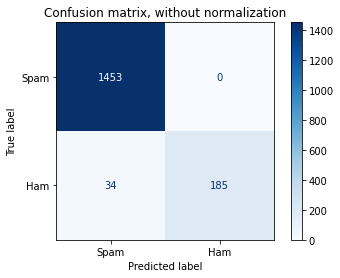

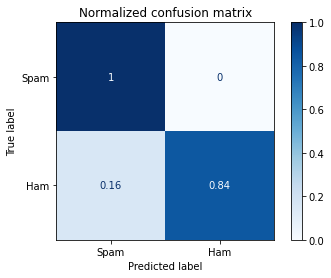

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

class_names = ['Spam', 'Ham']

titles_options = [
    ('Confusion matrix, without normalization', None),
    ('Normalized confusion matrix', 'true')
]

for title, normalize in titles_options:
    display = ConfusionMatrixDisplay.from_estimator(
        svm,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize
    )
    display.ax_.set_title(title)

    print(title)
    print(display.confusion_matrix)
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

f1 = make_scorer(f1_score, average='micro')
estimator = LogisticRegression()
cross = cross_val_score(estimator, X_train, y_train, scoring=f1)


logistic = LogisticRegression(solver='liblinear', penalty='l1')
logistic.fit(X_train, y_train)
pred = logistic.predict(X_test)
print(f'{accuracy_score(y_test, pred)}')
print(f'{cross.mean()}')

0.9778708133971292
0.9805128205128206


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import io
import pydotplus

from IPython.display import Image 

dt = tree.DecisionTreeClassifier()

# what is a good reason to choose a certain max depth indicator amount?
dt = tree.DecisionTreeClassifier(max_depth=2)

dt.fit(
    X_train,
    y_train,
)

dot_data = io.StringIO()  

tree.export_graphviz(
    dt,
    out_file=dot_data,
)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
tree.plot_tree(dt)
plt.show()

In [ ]:
# Decision path code from ski-learn. Need to add to it to produce the outputs displayed in Project 1
# It says to Select at least three observations from the test dataset where the target label is ‘spam’ and show the decision path.

threshold = dt.tree_.threshold
node_indicator = dt.decision_path(X_test)
leaf_id = dt.apply(X_test)

sample_id = 0
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

print("Rules used to predict sample {id}:\n".format(id=sample_id))
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split y_train for sample 0 is below threshold
    if X_test[sample_id, y_train[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        "decision node {node} : (X_test[{sample}, {y_train}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            y_train=y_train[node_id],
            value=X_test[sample_id, y_train[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )

In [ ]:
f1 = make_scorer(f1_score, average='micro')
estimator = tree.DecisionTreeClassifier()
cross = cross_val_score(estimator, X_train, y_train, scoring=f1)

decision_tr = DecisionTreeClassifier()
# decision_tr.fit(X_train, y_train)
# pred = decision_tr.predict(X_test)
# print(f'{accuracy_score(y_test, pred)}')
# print(f'{cross.mean()}')
decision_tr.fit(X_train, y_train)

# predict
y_pred = decision_tr.predict(X_test)

# f1 score
# maybe it changes based on which one we put first?
score = f1_score(y_pred, y_test)

# print
print("Decision Tree F1 score: {:2f}".format(score))

[Assistance 1](https://towardsdatascience.com/spam-detection-with-logistic-regression-23e3709e522)  
[Assistance 2](https://pythonprogramminglanguage.com/logistic-regression-spam-filter/)  
[Assistance 3](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)  
Attatched above are basically what we can referance for the logistical and other regressive types. Vectorization and data preprocessing seems important will address later.